In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:10]

[PosixPath('datasets/flower_photos/roses/15498482197_8878cdfb07_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7376471712_e1be793f94.jpg'),
 PosixPath('datasets/flower_photos/roses/8060338380_eb6c806624_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6969041818_a505baa68e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15566697073_9a214b700e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5073473370_bdbb5a99fc.jpg'),
 PosixPath('datasets/flower_photos/roses/3624546109_8eb98f0cdb.jpg'),
 PosixPath('datasets/flower_photos/roses/14312910041_b747240d56_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3697780051_83e50a6dd1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5212877807_a3ddf06a7c_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/15498482197_8878cdfb07_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7376471712_e1be793f94.jpg'),
 PosixPath('datasets/flower_photos/roses/8060338380_eb6c806624_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6969041818_a505baa68e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15566697073_9a214b700e_n.jpg')]

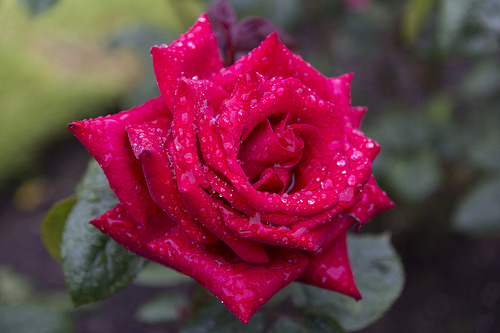

In [8]:
PIL.Image.open(str(roses[1])) #Pillow Library

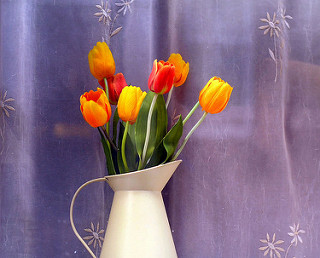

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
# Read flowers images from disk into numpy array using opencv
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/15498482197_8878cdfb07_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7376471712_e1be793f94.jpg'),
 PosixPath('datasets/flower_photos/roses/8060338380_eb6c806624_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6969041818_a505baa68e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15566697073_9a214b700e_n.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/15498482197_8878cdfb07_n.jpg'

In [14]:
import cv2
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(257, 320, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
y[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [19]:
X[0]

array([[[248, 231, 188],
        [248, 230, 189],
        [248, 229, 191],
        ...,
        [148, 137, 110],
        [141, 133, 105],
        [138, 130, 101]],

       [[250, 231, 189],
        [249, 230, 189],
        [249, 229, 191],
        ...,
        [143, 132, 108],
        [139, 129, 104],
        [135, 127, 100]],

       [[251, 231, 189],
        [250, 230, 189],
        [250, 229, 191],
        ...,
        [138, 127, 105],
        [133, 125, 102],
        [131, 124, 100]],

       ...,

       [[201, 191, 164],
        [168, 162, 134],
        [128, 126,  96],
        ...,
        [ 84, 136, 172],
        [ 87, 140, 177],
        [ 90, 142, 179]],

       [[193, 181, 157],
        [158, 153, 123],
        [124, 120,  95],
        ...,
        [ 88, 141, 176],
        [ 90, 143, 181],
        [ 93, 145, 182]],

       [[185, 175, 147],
        [153, 144, 115],
        [113, 115,  87],
        ...,
        [ 92, 144, 177],
        [ 94, 146, 182],
        [ 96, 147, 188]]

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [23]:
X_test_scaled[3]

array([[[0.90588235, 0.92156863, 0.9254902 ],
        [0.90980392, 0.9254902 , 0.92941176],
        [0.90980392, 0.92941176, 0.93333333],
        ...,
        [0.93333333, 0.95294118, 0.95686275],
        [0.93333333, 0.94901961, 0.95294118],
        [0.92941176, 0.94509804, 0.94901961]],

       [[0.90980392, 0.9254902 , 0.92941176],
        [0.90980392, 0.9254902 , 0.92941176],
        [0.91372549, 0.92941176, 0.93333333],
        ...,
        [0.9372549 , 0.95294118, 0.95686275],
        [0.93333333, 0.94901961, 0.95294118],
        [0.93333333, 0.94901961, 0.95294118]],

       [[0.91372549, 0.92941176, 0.93333333],
        [0.91372549, 0.92941176, 0.93333333],
        [0.91372549, 0.92941176, 0.93333333],
        ...,
        [0.93333333, 0.95294118, 0.95686275],
        [0.93333333, 0.94901961, 0.95294118],
        [0.92941176, 0.94509804, 0.94901961]],

       ...,

       [[0.        , 0.21960784, 0.22745098],
        [0.        , 0.21960784, 0.22352941],
        [0.        , 0

In [24]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [25]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18240032375918428511
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14417788928
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2072208015267810961
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [26]:
# BUILDING CONVOLUTION NEURAL NETWORK 
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=50)  

Epoch 1/50
86/86 [==============================] - 10s 23ms/step - loss: 1.3371 - accuracy: 0.4299
Epoch 2/50
86/86 [==============================] - 2s 24ms/step - loss: 1.0165 - accuracy: 0.5952
Epoch 3/50
86/86 [==============================] - 2s 23ms/step - loss: 0.8181 - accuracy: 0.6835
Epoch 4/50
86/86 [==============================] - 2s 23ms/step - loss: 0.6486 - accuracy: 0.7598
Epoch 5/50
86/86 [==============================] - 2s 23ms/step - loss: 0.4201 - accuracy: 0.8496
Epoch 6/50
86/86 [==============================] - 2s 23ms/step - loss: 0.2361 - accuracy: 0.9211
Epoch 7/50
86/86 [==============================] - 2s 23ms/step - loss: 0.1174 - accuracy: 0.9677
Epoch 8/50
86/86 [==============================] - 2s 23ms/step - loss: 0.0643 - accuracy: 0.9826
Epoch 9/50
86/86 [==============================] - 2s 24ms/step - loss: 0.0629 - accuracy: 0.9786
Epoch 10/50
86/86 [==============================] - 2s 23ms/step - loss: 0.0353 - accuracy: 0.9913
Epoch 11

In [27]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 18ms/step - loss: 3.8042 - accuracy: 0.6329


[3.8041884899139404, 0.6328976154327393]

In [28]:
# OVERFITTING 
# Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting


In [29]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 11ms/step


array([[  0.9232248 ,  65.77993   , -10.017964  , -28.053627  ,
        -16.461386  ],
       [ 12.674698  ,  10.186582  ,   5.4318504 , -16.790129  ,
         -2.3828995 ],
       [ -9.945214  ,   0.25840363,  11.744059  ,  -0.1080529 ,
         -5.066571  ],
       ...,
       [ 11.347061  ,  -2.6866224 , -26.67412   ,   9.136889  ,
         16.886189  ],
       [  8.243985  ,   0.80692655,  -1.9164188 , -10.393252  ,
          9.492578  ],
       [ -9.165067  ,  -6.296289  ,  10.56949   ,  14.372758  ,
         -5.4780293 ]], dtype=float32)

In [30]:
score = tf.nn.softmax(predictions[0])

In [31]:
np.argmax(score)

1

In [32]:
y_test[0]

1

Improve Test Accuracy Using Data Augmentation

In [33]:
data_augmentation = keras.Sequential(
  [
   
    #layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.3),
  ]
)

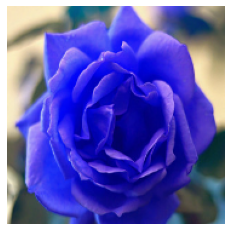

In [34]:
plt.axis('off')
plt.imshow(X[0])

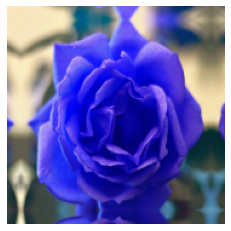

In [35]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))
# ZOOMED IMAGE

Train the model using data augmentation and a drop out layer

In [36]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=50)    

Epoch 1/50
86/86 [==============================] - 3s 24ms/step - loss: 1.3079 - accuracy: 0.4437
Epoch 2/50
86/86 [==============================] - 2s 24ms/step - loss: 0.9989 - accuracy: 0.6032
Epoch 3/50
86/86 [==============================] - 2s 24ms/step - loss: 0.8574 - accuracy: 0.6602
Epoch 4/50
86/86 [==============================] - 2s 24ms/step - loss: 0.7696 - accuracy: 0.6980
Epoch 5/50
86/86 [==============================] - 2s 24ms/step - loss: 0.6953 - accuracy: 0.7329
Epoch 6/50
86/86 [==============================] - 2s 24ms/step - loss: 0.6383 - accuracy: 0.7536
Epoch 7/50
86/86 [==============================] - 2s 23ms/step - loss: 0.5706 - accuracy: 0.7802
Epoch 8/50
86/86 [==============================] - 2s 24ms/step - loss: 0.4973 - accuracy: 0.8114
Epoch 9/50
86/86 [==============================] - 2s 24ms/step - loss: 0.4262 - accuracy: 0.8401
Epoch 10/50
86/86 [==============================] - 2s 24ms/step - loss: 0.3692 - accuracy: 0.8659
Epoch 11/

In [37]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 14ms/step - loss: 2.1470 - accuracy: 0.6874


[2.147024154663086, 0.687363862991333]